Performance analysis for NNPZ using different input sizes.
See the [task #15623](https://redmine.isdc.unige.ch/issues/15623).

### System information

In [1]:
import psutil
import cpuinfo

In [2]:
memory_gb = psutil.virtual_memory().total / 2**30
cpu = cpuinfo.get_cpu_info()
print(f"""
Memory: {memory_gb:.2f} GB
CPU: {cpu['brand']}
  L3: {cpu['l3_cache_size']}
  L2: {cpu['l2_cache_size']}
""")


Memory: 15.51 GB
CPU: Intel(R) Xeon(R) CPU E3-1505M v6 @ 3.00GHz
  L3: 8192 KB
  L2: 256 KB



## Performance of NNPZ

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy.table import Table

In [4]:
perf_data = Table.read('nnpz_perf_size_correction.csv')\
    .group_by('Input').groups.aggregate(np.mean)

<IPython.core.display.Javascript object>


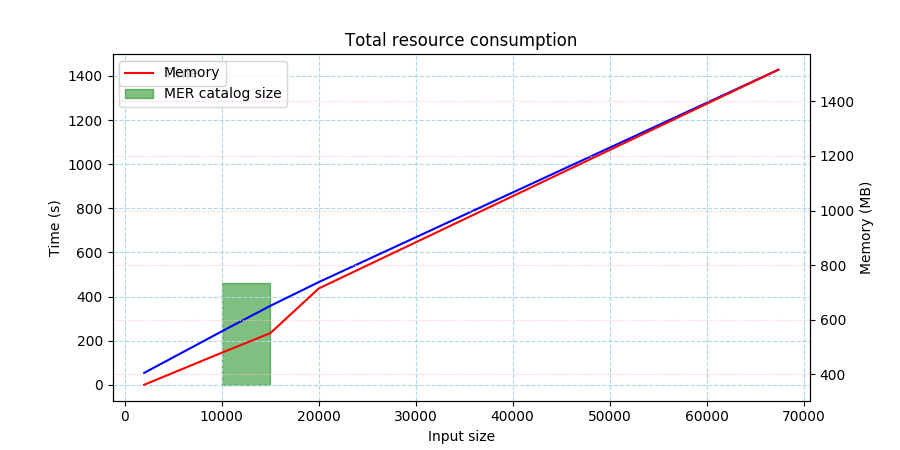

In [5]:
expected_catalog_size = patches.Rectangle(
    (10000,0), 5000, 460,
    color='green', alpha=0.5,
    label='MER catalog size'
)

fig, ax = plt.subplots(1, figsize=(9, 4.5))
ax.add_patch(expected_catalog_size)

ax.plot(perf_data['Input'], perf_data['Time'], color='b', label='Time')
ax.set_xlabel('Input size')
ax.set_ylabel('Time (s)')

ax.legend()
ax.grid(linestyle='--', c='lightblue')

twin = ax.twinx()
twin.plot(perf_data['Input'], perf_data['MaxMemory'], color='r', label='Memory')
twin.set_ylabel('Memory (MB)')
twin.legend()
twin.grid(linestyle=':', c='pink')

_ = ax.set_title('Total resource consumption')

<IPython.core.display.Javascript object>


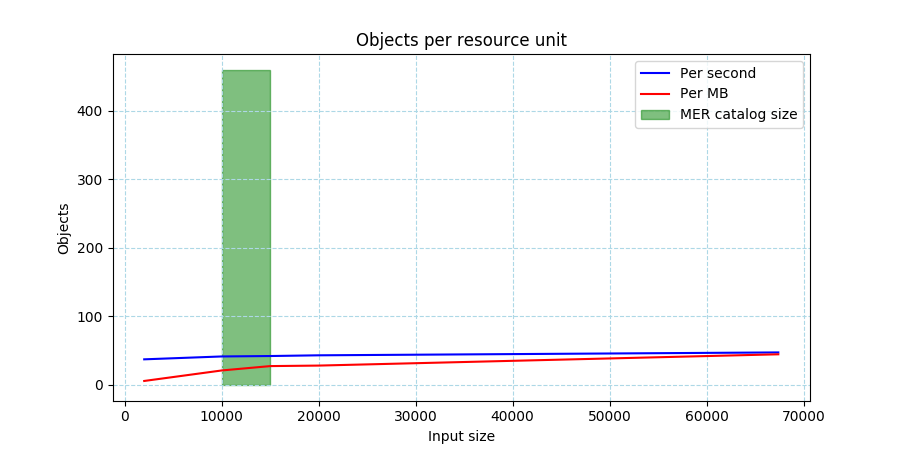

In [6]:
expected_catalog_size = patches.Rectangle(
    (10000,0), 5000, 460,
    color='green', alpha=0.5,
    label='MER catalog size'
)

fig, ax = plt.subplots(1, figsize=(9, 4.5))
ax.add_patch(expected_catalog_size)

ax.plot(perf_data['Input'], perf_data['Input'] / perf_data['Time'], c='b', label='Per second')
ax.plot(perf_data['Input'], perf_data['Input'] / perf_data['MaxMemory'], color='r', label='Per MB')

ax.grid(linestyle='--', c='lightblue')
ax.set_xlabel('Input size')
ax.set_ylabel('Objects')
ax.legend()
_ = ax.set_title('Objects per resource unit')

The reference sample used has 1,801 entries.
There is no noticeable difference on number of sources per second regardless of the catalog size.